## Digit recognition: Logistic Regression

**Strategy:** First classify digits individually. Then classify data into 10 classes (multivariate). <br/>
**Cost function:** Log loss
    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, metrics
from sklearn.metrics import confusion_matrix,accuracy_score,log_loss, roc_curve
import statsmodels.api as sm
from sklearn.model_selection import train_test_split,cross_val_score, GridSearchCV

**Get the data**

In [2]:
raw_training_data = pd.read_csv("data/zip.train", header=None , sep=" ")
test_data = pd.read_csv("data/zip.test", header=None , sep=" ")

**Functions for removing NaN and rename target column**

In [3]:
def remove_nan (df):
    return df.dropna(axis=1, how='any',thresh=None)

def rename_labels (df):
    return df.rename(columns={0:'Labels'}, inplace=True)

**Clean data with the help of above functions**

In [4]:
rename_labels(raw_training_data)
training_data = remove_nan(raw_training_data) # Give the training data a new, better name

rename_labels(test_data) # There are no NaN values in the test set

**Reserve some training data for fine tuning**

In [5]:
training_data, extra_training_data = train_test_split(training_data, test_size=0.05, random_state=11)


**Eyeball the digit distribution among data sets**

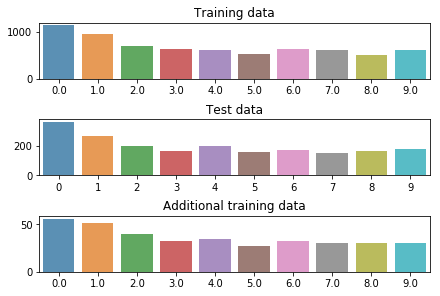

In [6]:
traincount = pd.value_counts(training_data['Labels'].values, sort=True)
extracount = pd.value_counts(extra_training_data['Labels'].values,sort=True)
testcount = pd.value_counts(test_data['Labels'].values, sort=True)

f,(ax1,ax2,ax3) = plt.subplots(3,constrained_layout=True)
sns.barplot(traincount.index, traincount.values, alpha=0.8,ax=ax1)
sns.barplot(testcount.index, testcount.values, alpha=0.8,ax=ax2)
sns.barplot(extracount.index, extracount.values, alpha=0.8,ax=ax3)
ax1.set_title('Training data')
ax2.set_title('Test data')
ax3.set_title('Additional training data')
plt.show()

The digits appear to be similarly distributed among train, extra, and test sets.

## Digit as object, dataset as argument##
<br/> I still need a good name for this class!

In [7]:
class No_Name :
    
    def __init__(self,digit,data_train,data_test) :  
        self.digit = digit
        self.data_train = data_train
        self.data_test = data_test
        
    def remove_train_labels(self):
        return self.data_train.drop('Labels',axis=1)
        
    def remove_test_labels(self):
        return self.data_test.drop('Labels',axis=1)
   
    def get_test_labels(self):
        return (self.data_test['Labels'])
    
    def get_train_labels(self):
        return (self.data_train['Labels'])
    
    def get_classified (self,df):
        return (df['Labels'] == self.digit).astype(np.int)
    
    def get_fit(self):
        X = self.remove_train_labels()
        y = self.get_classified(self.data_train)
        logreg = 0
        logreg = LogisticRegression()
        logreg.fit(X,y)
        return logreg
    
    def predict_it (self):
        return pd.DataFrame((self.get_fit()).predict(self.remove_test_labels()))
    
    def get_prob (self,X):
        return (self.get_fit()).predict_proba(X)

    def get_log_loss (self):
        y_predict =self.predict_it()
        y_true = self.get_classified(self.data_test)
        return log_loss (y_predict,y_true)
    

** Some functions to help with multinomial logisitic regression**

In [8]:
def remove_labels(df):
    return df.drop('Labels',axis=1)
   
def get_labels(df):
    return (df['Labels'])

** A function to help organize the results**

In [9]:
def get_results_df (string):
    first = []
    second = []
    third = []
    for dig in digits :
        first.append((pd.value_counts((digits[dig].predict_it()[0].values)))[1])
        second.append((pd.value_counts(digits[dig].get_classified(digits[dig].data_test)).values)[1])
        third.append(digits[dig].get_log_loss())
    results = pd.DataFrame(first)
    results['Actual'] = second
    results['Log loss'] = third
    results.columns = ['Predict','Actual','Log loss: ' + str(string)]
    return results


def logloss(true_label, predicted, eps=1e-15):
    p = np.clip(predicted, eps, 1 - eps)
    if true_label == 1:
        return -math.log(p)
    else:
        return -math.log(1 - p)



## Create ten object instances

In [10]:
digits = {  }
digit_list = ['zero','one','two','three','four','five','six','seven','eight','nine']

k = 0
for i in digit_list :
    digits[i]= No_Name(data_test=training_data,data_train=training_data,digit=k)
    k += 1


## Logistic Regression for each digit

- Initialize a classifier instance
- Fit 
- Predict
- Measure

** With the training data**

In [11]:
train_results = get_results_df('train')
train_results

,Predict,Actual,Log loss: train
0,607,615,0.099738
1,602,614,0.379004
2,626,631,0.114699
3,604,625,0.274280
4,660,691,0.244359
5,602,617,0.294227
6,1134,1138,0.069817
7,506,529,0.224411
8,461,512,0.483731
9,955,954,0.014961


**With the extra training data**

In [12]:
digits = {  }
digit_list = ['zero','one','two','three','four','five','six','seven','eight','nine']

k = 0
for i in digit_list :
    digits[i]= No_Name(data_test=extra_training_data,data_train=training_data,digit=k)
    k += 1


In [13]:
extra_results = get_results_df('extra')
extra_results

,Predict,Actual,Log loss: extra
0,32,30,0.378509
1,28,30,0.378514
2,30,33,0.283887
3,34,33,0.662394
4,40,40,0.567767
5,36,35,1.040906
6,58,56,0.567765
7,27,27,1.135535
8,34,30,0.567763
9,49,51,0.378514


**With the extra training data**

In [14]:
digits = {  }
digit_list = ['zero','one','two','three','four','five','six','seven','eight','nine']

k = 0
for i in digit_list :
    digits[i]= No_Name(data_test=extra_training_data,data_train=training_data,digit=k)
    k += 1



In [15]:
extra_results = get_results_df('extra')
extra_results

,Predict,Actual,Log loss: extra
0,32,30,0.378509
1,28,30,0.378514
2,30,33,0.283887
3,34,33,0.662394
4,40,40,0.567767
5,36,35,1.040906
6,58,56,0.567765
7,27,27,1.135535
8,34,30,0.567763
9,49,51,0.378514


** With the test data**

In [16]:
digits = {  }
digit_list = ['zero','one','two','three','four','five','six','seven','eight','nine']

k = 0
for i in digit_list :
    digits[i]= No_Name(data_test=test_data,data_train=training_data,digit=k)
    k += 1

In [17]:
test_results = get_results_df('test')
test_results

,Predict,Actual,Log loss: test
0,144,147,0.395816
1,199,177,0.894882
2,168,170,0.481862
3,165,166,1.118608
4,180,198,0.998146
5,195,200,1.049772
6,365,359,0.619536
7,149,160,0.808842
8,151,166,1.221867
9,254,264,0.275352


** Why is the log loss so different for different digits?**

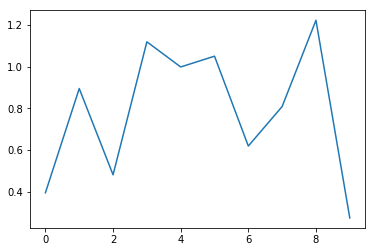

In [98]:
x1 = train_results.index.values
x2 = extra_results.index.values
x3 = test_results.index.values
y = (get_results_df('test')).iloc[:,2]

#plt.plot(x2,y);

plt.plot(x1,y);

#plt.plot(x3,y);

**Trying to plot the log_loss and probabilities**

## Digit: Three

In [103]:
prob_3 = pd.DataFrame(digits['three'].get_prob(remove_labels(test_data)))

three_df = test_data.copy()
three_df['P(=3)'] = prob_3[1]
three_df['Predict'] = digits['three'].predict_it()
three_df['True'] = digits['three'].get_classified(test_data)

logloss_list = []

for i in (three_df.index):
    logloss_list.append(logloss(three_df['True'][i],three_df['Predict'][i]))
    
three_df.reset_index()
three_df['LogLoss'] = logloss_list

three_df.head()


,Labels,1,2,3,4,5,6,7,8,9,...,251,252,253,254,255,256,P(=3),Predict,True,LogLoss
0,9,-1.0,-1.0,-1.0,-1.000,-1.0,-0.948,-0.561,0.148,0.384,...,-0.973,-1.000,-1.0,-1.0,-1.0,-1.0,1.089037e-03,0,0,9.992007e-16
1,6,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,9.680597e-09,0,0,9.992007e-16
2,3,-1.0,-1.0,-1.0,-0.593,0.7,1.000,1.000,1.000,1.000,...,-0.393,-1.000,-1.0,-1.0,-1.0,-1.0,9.998124e-01,1,1,9.992007e-16
3,6,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,4.488326e-08,0,0,9.992007e-16
4,6,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-0.858,-0.106,...,-0.369,-0.867,-1.0,-1.0,-1.0,-1.0,1.030462e-06,0,0,9.992007e-16


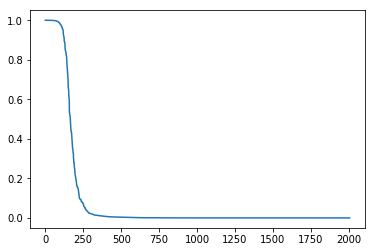

In [105]:
three_df_sort = three_df.sort_values('P(=3)',ascending=False)

x = list(range(0,2007))
y = three_df_sort['P(=3)']

plt.plot(x,y)
plt.show();

#Title:Probability given image is three

In [21]:
def logloss(true_label, predicted, eps=1e-15):
    p = np.clip(predicted, eps, 1 - eps)
    if true_label == 1:
        return -math.log(p)
    else:
        return -math.log(1 - p)

logloss_list = []

for i in (three_df.index):
    logloss_list.append(logloss(three_df['True'][i],three_df['Predict'][i]))
    
three_df.reset_index()
three_df['LogLoss'] = logloss_list

three_df.head()

,Labels,1,2,3,4,5,6,7,8,9,...,251,252,253,254,255,256,P(=3),Predict,True,LogLoss
0,9,-1.0,-1.0,-1.0,-1.000,-1.0,-0.948,-0.561,0.148,0.384,...,-0.973,-1.000,-1.0,-1.0,-1.0,-1.0,1.089037e-03,0,0,9.992007e-16
1,6,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,9.680597e-09,0,0,9.992007e-16
2,3,-1.0,-1.0,-1.0,-0.593,0.7,1.000,1.000,1.000,1.000,...,-0.393,-1.000,-1.0,-1.0,-1.0,-1.0,9.998124e-01,1,1,9.992007e-16
3,6,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-1.000,-1.000,...,-1.000,-1.000,-1.0,-1.0,-1.0,-1.0,4.488326e-08,0,0,9.992007e-16
4,6,-1.0,-1.0,-1.0,-1.000,-1.0,-1.000,-1.000,-0.858,-0.106,...,-0.369,-0.867,-1.0,-1.0,-1.0,-1.0,1.030462e-06,0,0,9.992007e-16


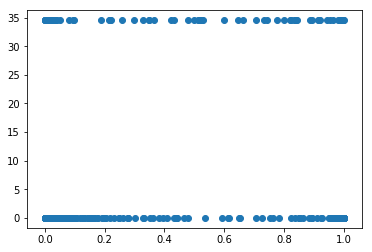

In [22]:
#
#x = three_df['P(=3)']
#y = three_df['LogLoss']
#
#plt.scatter(x,y)
#plt.show()
#
three_df_2 = three_df.copy()
three_df_2 = three_df_2.drop(three_df_2[(three_df_2['LogLoss']>1)==True].index)
three_df = three_df.sort_values('P(=3)')

x = three_df['P(=3)']
y = three_df['LogLoss']

#plt.ylim(ymax=0.005)  # adjust the max leaving min unchanged
#plt.ylim(ymin=0)  # adjust the min leaving max unchanged

plt.scatter(x,y)
plt.show()


#three_df_2

In [23]:
#print (logreg_8.predict_proba(df)) # Pretty confident it's an 8
#print (logreg_0.predict_proba(df)) # Pretty condifent it's not a 0

#kt =((logreg_8.predict_proba(df))[0][1]) # Probability it's true
#
#
#print ("%.2f%%" % (kt*100))

## Multinomial Logistic Regression

**Organize training data into digit and not-digit (input and targets)**

In [24]:
X_train = remove_labels(training_data)
X_extra = remove_labels(extra_training_data)
X_test = remove_labels(test_data)

y_train = get_labels(training_data)
y_extra = get_labels(extra_training_data)
y_test = get_labels(test_data)


**Initialize a classifer instance**

In [25]:
logisticRegr = LogisticRegression(solver = 'lbfgs',C=0.5,multi_class='multinomial')

**Fit the model**

In [26]:
logisticRegr.fit(X=X_train,y=y_train)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

**Evaluate the model**

In [27]:
train_prediction = logisticRegr.predict(X=X_train)
train_score = logisticRegr.score(X_train, y_train)
train_score

0.9907594571181056

In [28]:
extra_prediction = logisticRegr.predict(X=X_extra)
extra_score = logisticRegr.score(X_extra, y_extra)
extra_score

0.9342465753424658

In [29]:
test_prediction = logisticRegr.predict(X=X_test)
test_score = logisticRegr.score(X_test,y_test)
test_score

0.911310413552566

In [30]:
#log_loss(y_pred=test_prediction,y_true=y_test)

In [31]:
print(classification_report(y_test, test_prediction))

             precision    recall  f1-score   support

          0       0.95      0.97      0.96       359
          1       0.99      0.95      0.97       264
          2       0.90      0.85      0.88       198
          3       0.84      0.90      0.87       166
          4       0.86      0.88      0.87       200
          5       0.87      0.86      0.86       160
          6       0.94      0.93      0.93       170
          7       0.91      0.91      0.91       147
          8       0.88      0.84      0.86       166
          9       0.89      0.94      0.91       177

avg / total       0.91      0.91      0.91      2007



**Observations:** Looking at the model as a whole, it correctly classifies images 91% of the time. Looking at the digit three specifically, when our model claims an image represents the number three, it is correct 84% of the time. Additionally, it detects 85% of the threes. Having a look at the f1 scores, our model isn't too bad.

**Confusion matrix**

In [32]:
#confusion_matrix = 
cm = confusion_matrix(y_test,test_prediction)
print cm

[[348   0   1   3   3   1   1   0   1   1]
 [  0 252   0   3   3   0   3   1   1   1]
 [  2   0 169   5   8   2   2   2   7   1]
 [  1   0   3 150   1   6   0   2   2   1]
 [  2   2   7   1 176   1   1   2   2   6]
 [  4   0   0   9   1 137   3   1   2   3]
 [  2   0   2   0   4   3 158   0   1   0]
 [  0   0   1   3   4   0   0 134   0   5]
 [  6   0   5   4   2   6   0   1 139   3]
 [  0   1   0   0   2   1   0   4   3 166]]


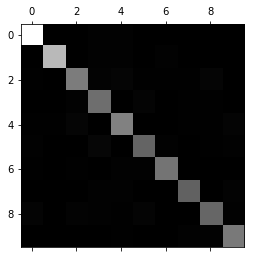

In [33]:
plt.matshow(cm,cmap=plt.cm.gray)
plt.show()

When looking at what the model does well, everything seems peachy.  But I'm interested in where the model has problems and makes mistakes.

In [34]:
row_sums = (cm.sum(axis=1,keepdims=True))
norm_conf_mx = cm / (row_sums)

*(Here is another example of Python 2 and Python 3 differences with float division)*

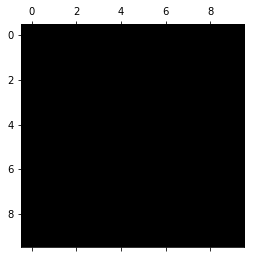

In [35]:
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)
plt.show()

The rows are the actual categories, and the columns are the predicted categories. The bright spots let us know where the model has misclassified results. Three appears to be a tricky digit. I wonder why? Do we have any mistakes in our training data? Have we forgotten to remove any labels?

**Mistakes made by the model**

In [80]:
#three_mistakes = three_df['Predict']== 1 & three_df['True']!=1

mistake_df = three_df.drop(three_df[(three_df['Predict'] == 1) & (three_df['True'] == 1)].index)
mistake_df = mistake_df.drop(mistake_df[(mistake_df['Predict'] == 0) & (mistake_df['True'] == 0)].index)
mistake_df_3 = mistake_df.drop(mistake_df[(mistake_df['Labels'] != 3)].index)



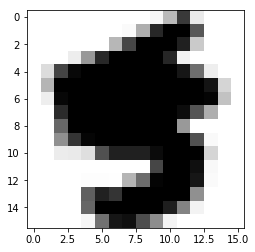

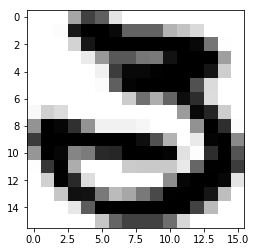

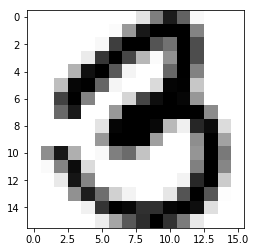

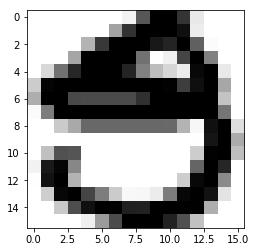

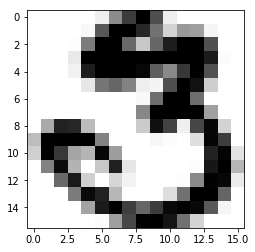

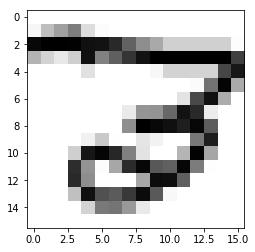

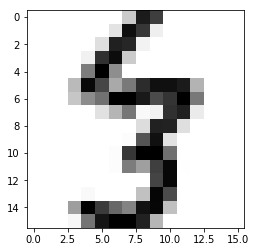

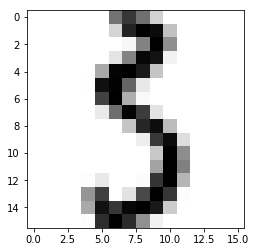

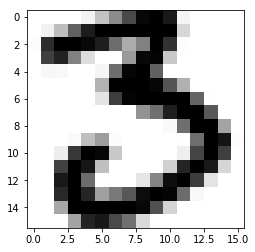

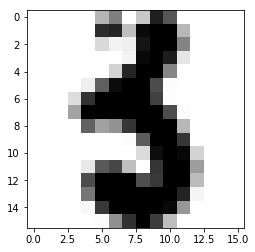

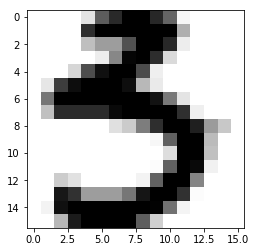

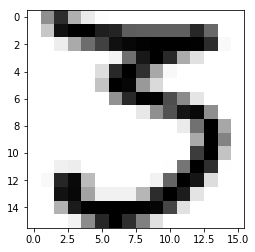

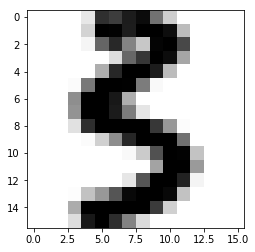

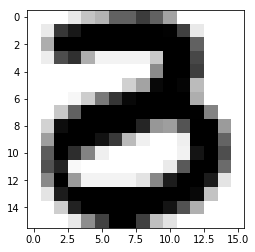

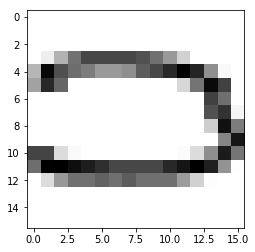

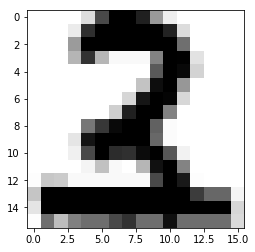

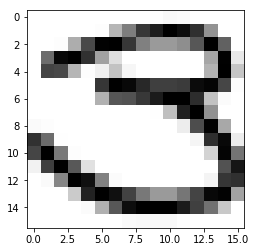

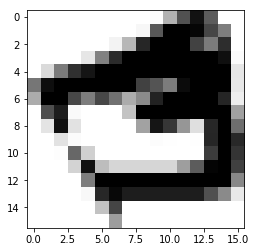

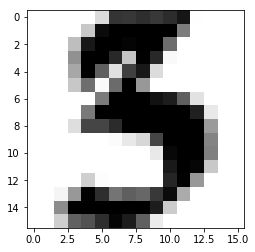

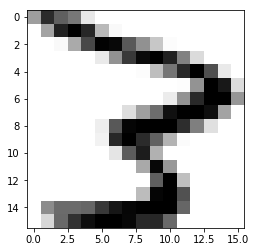

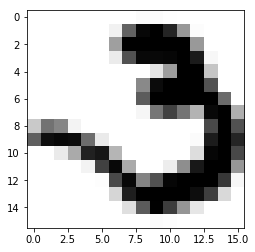

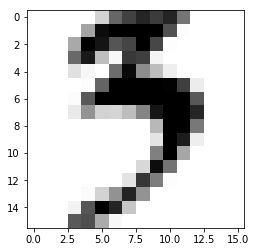

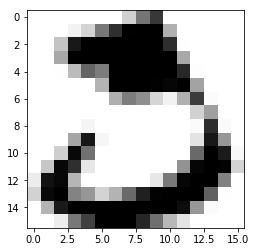

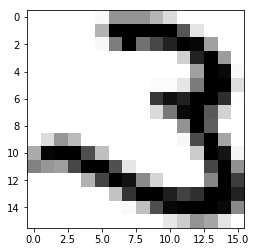

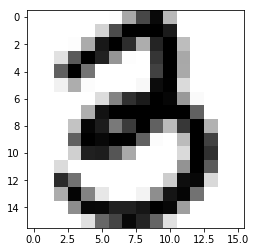

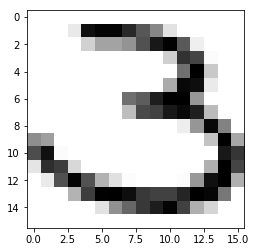

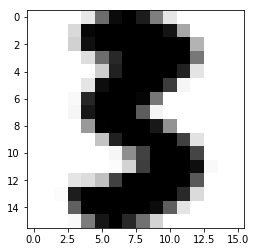

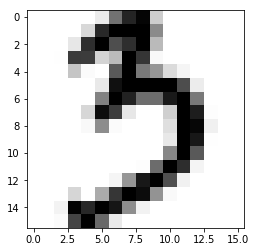

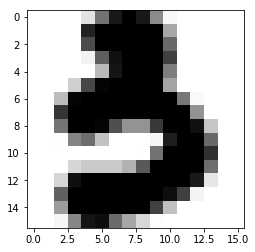

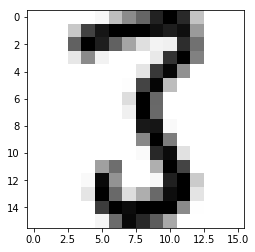

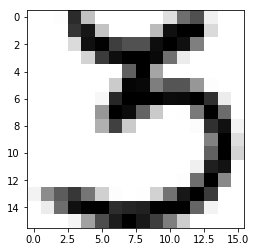

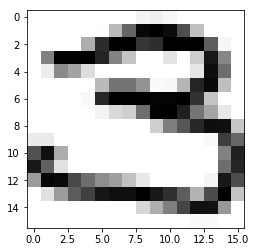

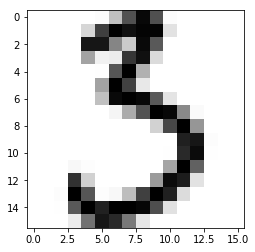

In [97]:
mistake_df_3

def get_image (data):
    return data[1:257]

mistake_df_3.reset_index()


for i in range (0,len(mistake_df_3)) :
    data= mistake_df_3.iloc[i,:]
    getNumberImage(get_image(data))
    plt.imshow(getNumberImage(get_image(data)), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show();
    i += 1

** Three is a magic number, but also a problematic number**

In [ ]:
some_num = test_data.iloc[0,:]

** Continuing to analyze the results**

In [ ]:
some_digit = remove_labels(test_data).iloc[0,:]
some_scores = logisticRegr.decision_function([some_digit])
some_scores

Is this a nine? That has the highest score.

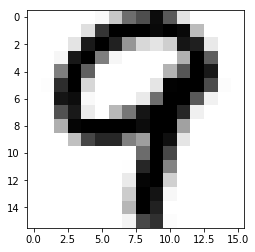

In [66]:
data = (test_data).iloc[0,1:]

def getNumberImage(data):
    return data.values.reshape(16,16)

plt.imshow(getNumberImage(data), cmap=plt.cm.gray_r, interpolation='nearest')

Yup!

**(Focusing on the "worst" digit, let's examine the digit three)....MAYBE!**